<a href="https://colab.research.google.com/github/shreyamanapure/world-population-in-2029/blob/main/world_population_in_2029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/population_by_country_2020.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [ ]:
for item in df["Yearly Change"]:
    new_item = item.translate( { ord("%"): None } )
    df['Yearly Change'].replace(item, new_item, inplace=True)
print("Done!")

Done!


In [ ]:
df.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

In [ ]:
columns_dict = {"Country (or dependency)":object,
    "Population (2020)":int,
    "Yearly Change":float,
    "Net Change":int,
    "Density (P/Km²)":int,
    "Land Area (Km²)":int,
    "Migrants (net)":float,
    "Fert. Rate":object,
    "Med. Age":object,
    "Urban Pop %":object,
    "World Share":object, }

df = df.astype(columns_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 20.3+ KB


In [ ]:
df[:21]

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212821986,0.72,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,206984347,2.58,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164972348,1.01,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145945524,0.04,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,129166028,1.06,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %


In [ ]:
yearly_change_list = []
for values in df['Yearly Change']:
    values = values/100
    yearly_change_list.append(values)

In [ ]:
country_list = []
for country in df['Country (or dependency)']:
    country_list.append(country)

In [ ]:
last_year = []
current_year = []
for items in df["Population (2020)"]:
    last_year.append(items)

In [ ]:
year = 2021

while year < 2030:
    counter = 0
    for value in last_year:
        new_population = (value*yearly_change_list[counter]) + value
        current_year.append(new_population)
        counter += 1
    year += 1
    last_year = current_year
    current_year = []
print("Done!")

Done!


In [ ]:
last_year

[1491648146.9927163,
 1510503801.1705353,
 349356250.2350601,
 301567958.1340777,
 264847792.46519393,
 227016772.75306034,
 260316535.77175507,
 180588668.3685863,
 146471769.31769234,
 142024068.6080449,
 123035092.20494644,
 145050294.57116005,
 123918469.83168177,
 122039164.51968598,
 105771334.51309225,
 119398838.2431553,
 93154969.54288693,
 94553603.71162784,
 86276439.30000597,
 71417775.45023149,
 71258983.6020984,
 66603285.09817839,
 59634892.558383316,
 78165837.00905856,
 66645081.83532368,
 57847411.253019765,
 66108719.467905626,
 51693818.89458909,
 56150673.03775439,
 46926578.30548658,
 61685155.465278015,
 49200382.62702177,
 51873988.420037225,
 54589071.87916317,
 41420818.98928475,
 49628750.55723139,
 48074829.36070763,
 37466290.42984052,
 40937195.310120985,
 41177271.20671089,
 40230738.57616918,
 38294840.229082935,
 37522061.62360169,
 44126903.113031164,
 36435538.591705285,
 40718423.745722555,
 37760813.25993588,
 36669292.127660535,
 34467257.798463784

In [ ]:
land_area = []
for item in df['Land Area (Km²)']:
    land_area.append(item)

In [ ]:
new_counter = 1
population_2020 = []
for item in df["Population (2020)"]:
    population_2020.append(item)
percent_change = []
for value in last_year:
    change = ((value-population_2020[last_year.index(value)])/population_2020[last_year.index(value)])*100
    percent_change.append(round(change, 2))

In [ ]:
data = {'Country (or dependency)': country_list,
       "Population (2029)": last_year,
       'Land Area (Km²)': land_area,
       'Percentage Change in Population (from 2020)': percent_change
       }

In [ ]:
df = pd.DataFrame(data)
df = df.sort_values("Population (2029)", ascending=False)
df['Percentage Change in Population (from 2020)'].max()
df[df['Percentage Change in Population (from 2020)'] == 40.37]

,Country (or dependency),Population (2029),Land Area (Km²),Percentage Change in Population (from 2020)
55,Niger,3.417575e+07,1266700,40.37


In [ ]:
df['Percentage Change in Population (from 2020)'].min()
df[df['Percentage Change in Population (from 2020)'] == -20.16]

,Country (or dependency),Population (2029),Land Area (Km²),Percentage Change in Population (from 2020)
140,Puerto Rico,2.273056e+06,8870,-20.16


In [ ]:
df[:21]

,Country (or dependency),Population (2029),Land Area (Km²),Percentage Change in Population (from 2020)
1,India,1.510504e+09,2973190,9.27
0,China,1.491648e+09,9388211,3.57
2,United States,3.493563e+08,9147420,5.44
3,Indonesia,3.015680e+08,1811570,10.05
4,Pakistan,2.648478e+08,770880,19.51
6,Nigeria,2.603165e+08,910770,25.77
5,Brazil,2.270168e+08,8358140,6.67
7,Bangladesh,1.805887e+08,130170,9.47
8,Russia,1.464718e+08,16376870,0.36
11,Ethiopia,1.450503e+08,1000000,25.66


In [ ]:
my_list = []
for items in df['Country (or dependency)']:
    my_list.append(items)
true_colour = []
for country in my_list:
    if len(country) == 3:
        true_colour.append("black")
    elif len(country) == 4:
        true_colour.append("red")
    elif len(country) == 5:
        true_colour.append("green")
    elif len(country) == 6:
        true_colour.append("orange")
    elif len(country) == 7:
        true_colour.append("yellow")
    elif len(country) == 8:
        true_colour.append("blue")
    elif len(country) == 9:
        true_colour.append("pink")
    elif len(country) == 10:
        true_colour.append("maroon")
    else:
        true_colour.append("grey")
print(my_list)

['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Ethiopia', 'Mexico', 'Philippines', 'Japan', 'Egypt', 'DR Congo', 'Vietnam', 'Iran', 'Turkey', 'Germany', 'Tanzania', 'Thailand', 'United Kingdom', 'South Africa', 'France', 'Kenya', 'Uganda', 'Italy', 'Myanmar', 'Colombia', 'Sudan', 'Algeria', 'South Korea', 'Iraq', 'Argentina', 'Afghanistan', 'Spain', 'Angola', 'Ukraine', 'Morocco', 'Canada', 'Mozambique', 'Saudi Arabia', 'Uzbekistan', 'Ghana', 'Peru', 'Poland', 'Yemen', 'Malaysia', 'Madagascar', 'Nepal', 'Niger', 'Cameroon', "Côte d'Ivoire", 'Australia', 'Venezuela', 'Burkina Faso', 'North Korea', 'Mali', 'Malawi', 'Taiwan', 'Zambia', 'Sri Lanka', 'Syria', 'Chad', 'Senegal', 'Guatemala', 'Kazakhstan', 'Chile', 'Somalia', 'Ecuador', 'Cambodia', 'Romania', 'Netherlands', 'Zimbabwe', 'Guinea', 'Rwanda', 'Burundi', 'Benin', 'Bolivia', 'Tunisia', 'Haiti', 'South Sudan', 'Belgium', 'Dominican Republic', 'Tajikistan', 'Honduras', 'Cub

In [ ]:
x_column = df['Land Area (Km²)']
y_column = df['Population (2029)']
clr = []
for items in x_column:
    if items < 100:
        clr.append('blue')
    elif items < 1000:
        clr.append('green')
    elif items < 10000:
        clr.append('gray')
    elif items < 100000:
        clr.append('yellow')
    elif items < 1000000:
        clr.append('black')
    elif items < 10000000:
        clr.append('maroon')
    elif items < 100000000:
        clr.append('magenta')
    elif items < 1000000000:
        clr.append('orange')
    else:
        clr.append('red')
print(clr)

['maroon', 'maroon', 'maroon', 'maroon', 'black', 'black', 'maroon', 'black', 'magenta', 'maroon', 'maroon', 'black', 'black', 'black', 'maroon', 'black', 'maroon', 'black', 'black', 'black', 'black', 'black', 'maroon', 'black', 'black', 'black', 'black', 'black', 'maroon', 'maroon', 'maroon', 'yellow', 'black', 'maroon', 'black', 'black', 'maroon', 'black', 'black', 'maroon', 'black', 'maroon', 'black', 'black', 'maroon', 'black', 'black', 'black', 'black', 'black', 'maroon', 'black', 'black', 'maroon', 'black', 'black', 'black', 'maroon', 'yellow', 'yellow', 'black', 'yellow', 'black', 'maroon', 'black', 'black', 'maroon', 'black', 'black', 'black', 'black', 'black', 'yellow', 'black', 'black', 'yellow', 'yellow', 'black', 'maroon', 'black', 'yellow', 'black', 'yellow', 'yellow', 'black', 'black', 'black', 'yellow', 'yellow', 'yellow', 'yellow', 'black', 'black', 'yellow', 'yellow', 'black', 'yellow', 'yellow', 'yellow', 'yellow', 'black', 'yellow', 'yellow', 'black', 'gray', 'black'

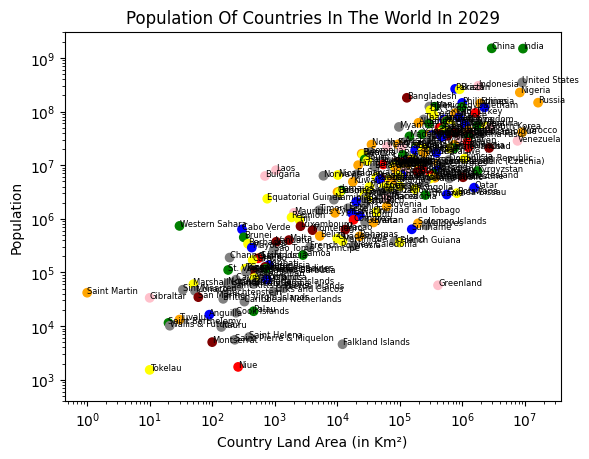

In [ ]:
plt.scatter(x_column, y_column, c=true_colour)
plt.title("Population Of Countries In The World In 2029")
plt.xlabel("Country Land Area (in Km²)")
plt.ylabel("Population")
plt.xscale('log')
plt.yscale('log')
countries = df['Country (or dependency)']
counter = 0
while counter <= 233:
    plt.text(x_column[counter], y_column[counter], my_list[counter], fontsize=6)
    counter+= 1
plt.savefig("World_Population_2029.png")
plt.show()